In [8]:
from graph_tool.all import *
import graph_tool.all as gt
import numpy as np
import scipy as sp
from scipy.integrate import simpson
import random
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from PyGnuplot import gp
import subprocess

In [9]:
Node = 10000

m = 2

times = 100

M_list  = [5, 10, 20, 50, 100, 200]

beta_list = [1,1/2,0,-1,-3,-5,-100]

net_list = ["SF", "Cutoff", "RA", "IPA_beta1", "IPA_beta3", "IPA_beta5", "IPA_beta100"]

In [10]:
from decimal import Decimal

w_list = [0.00, 0.50, 0.70, 0.90, 0.95, 0.98]

w_list = [Decimal(str(item)).quantize(Decimal('0.00')) for item in w_list]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


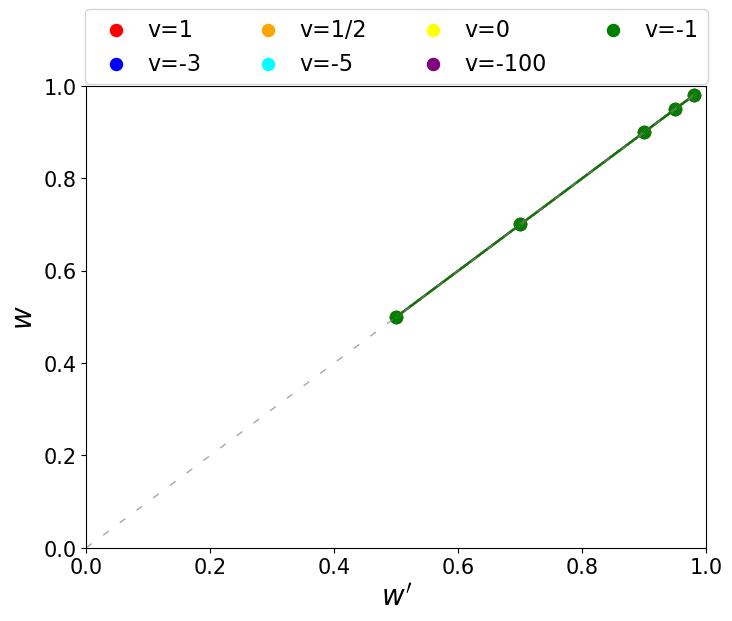

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


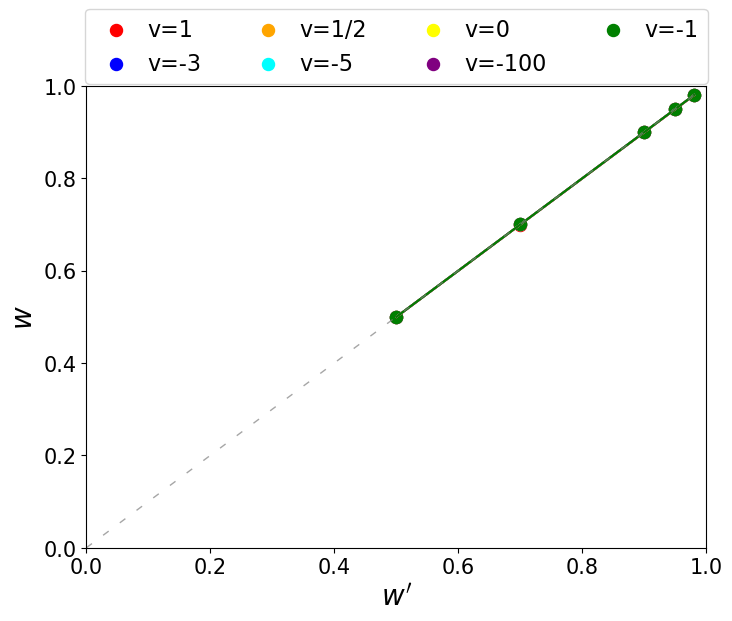

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


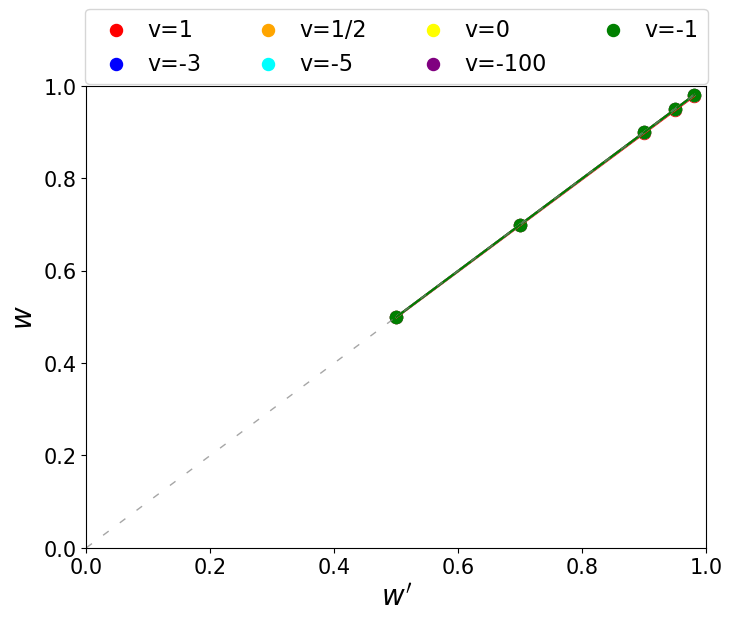

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


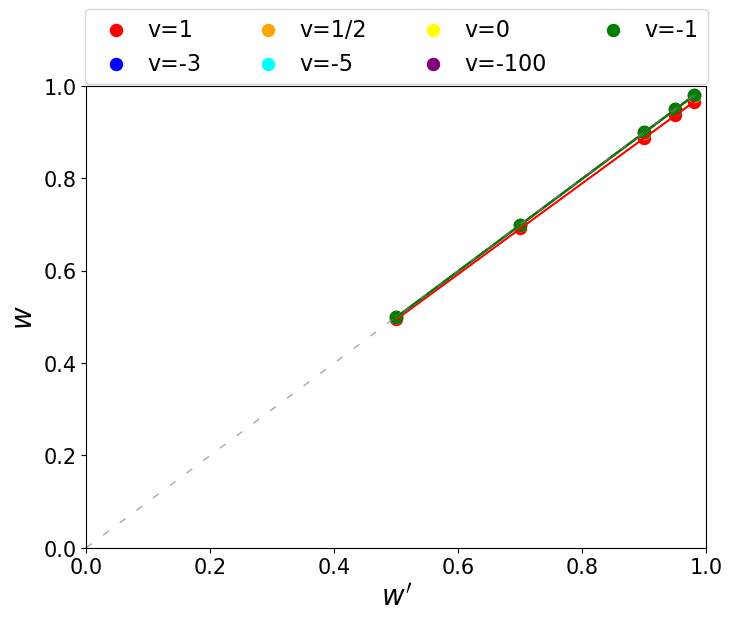

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


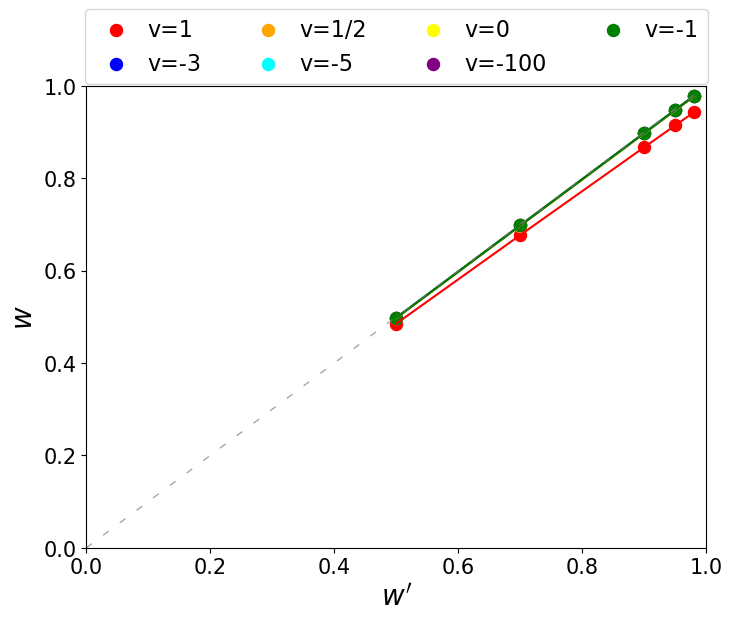

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


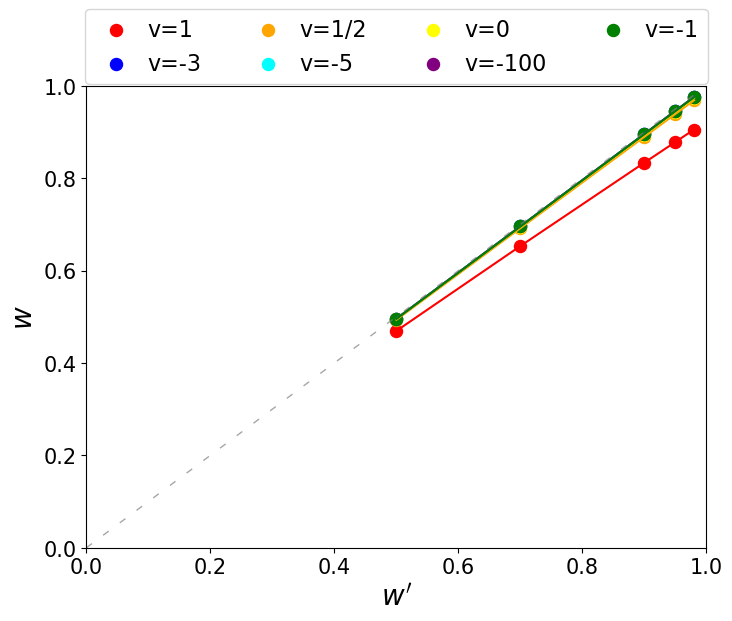

In [11]:
def plot_correlation(x_values, y_values, label, color, marker='o', size=100, linestyle='-'):  # linestyle引数を追加
    plt.scatter(x_values, y_values, label=label, color=color, marker=marker, s=size)  # 散布図を作成
    plt.plot(x_values, y_values, color=color, linestyle=linestyle)  # 線を引く

for M in M_list:
    save_path = f"~/o_t_hayashilab/modular_network_info/N={Node}/m0={M}/actual_w.npy"
    ac_w_file = np.load(os.path.expanduser(save_path), allow_pickle=True)
    
    # 散布図を作成
    plt.figure(figsize=(8, 6))
    
    plot_correlation(w_list[1:], ac_w_file[0], label='v=1', color='red', size=75)
    
    plot_correlation(w_list[1:], ac_w_file[4], label='v=-3', color='blue', size=75)
    
    plot_correlation(w_list[1:], ac_w_file[1], label='v=1/2', color='orange', size=75)
    
    plot_correlation(w_list[1:], ac_w_file[5], label='v=-5', color='cyan', size=75)
    
    plot_correlation(w_list[1:], ac_w_file[2], label='v=0', color='yellow', size=75)
    
    plot_correlation(w_list[1:], ac_w_file[6], label='v=-100', color='purple', size=75)
    
    plot_correlation(w_list[1:], ac_w_file[3], label='v=-1', color='green', size=75)
    
    # y = x の薄い点線を追加
    plt.plot([0, 1], [0, 1], color='gray', linestyle=(0, (5, 10)), linewidth=1, alpha=0.7)

    
    # 軸ラベルの設定
    plt.xlabel(r"$w'$", fontsize=20)
    plt.ylabel(r"$w$", fontsize=20)
    
    # x軸の範囲を設定（0から最大値+0.05）
    plt.xlim(0, 1.0)
    # x軸の目盛りを調整（ここでは0.1刻みに設定し、フォントサイズを15に）
    plt.xticks(ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=15)
    
    # y軸の範囲を設定（0から最大値+0.05）
    plt.ylim(0, 1.0)
    plt.yticks(ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=15)
    
    # 凡例の設定（上に2×2で配置）
    plt.legend(loc='upper center', fontsize=16, bbox_to_anchor=(0.5, 1.19), ncol=4, handletextpad=0.4)
    
    # 保存先のディレクトリを指定
    save_dir = os.path.expanduser('~/o_t_hayashilab/modular_network_info/actual_w_plot/')
    os.makedirs(save_dir, exist_ok=True)  # ディレクトリが存在しない場合は作成
    # EPS形式で図を保存（フルパスを指定）
    save_path = os.path.join(save_dir, f"actual_w_mo{M}.eps")
    plt.savefig(save_path, format='eps', bbox_inches='tight')
    
    # プロットの表示
    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


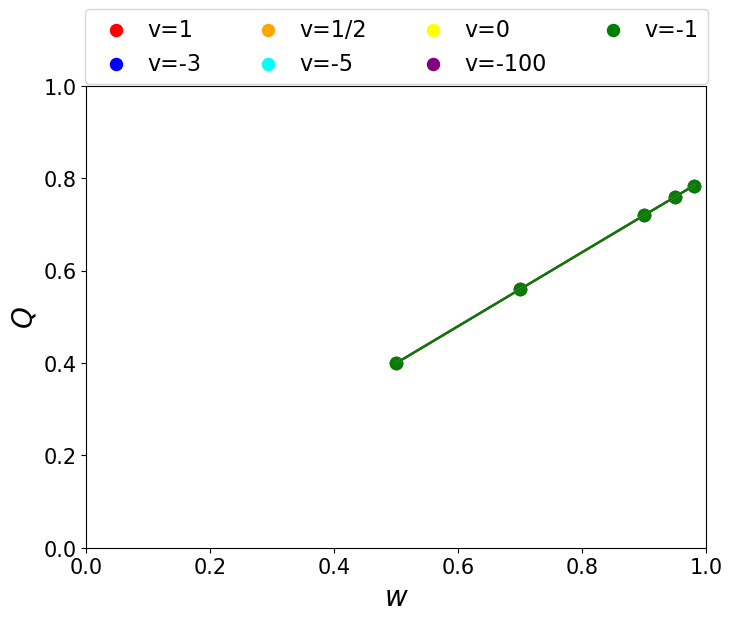

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


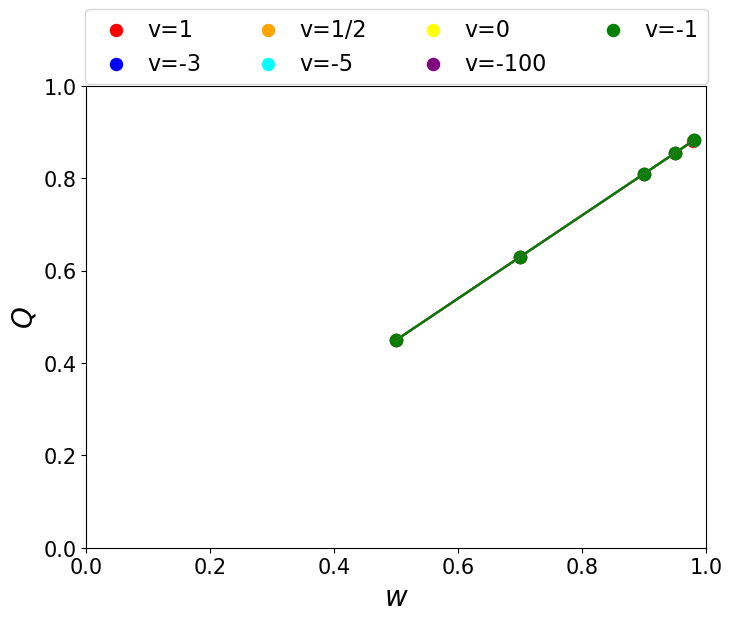

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


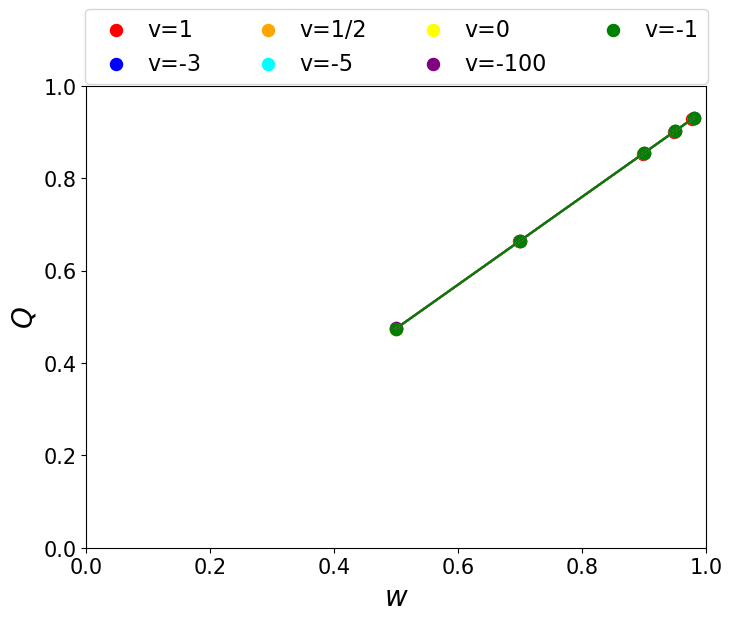

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


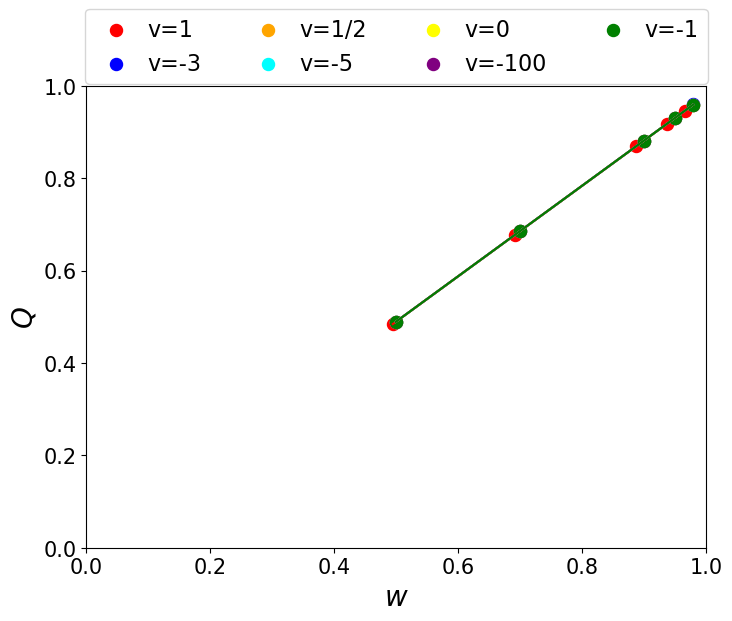

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


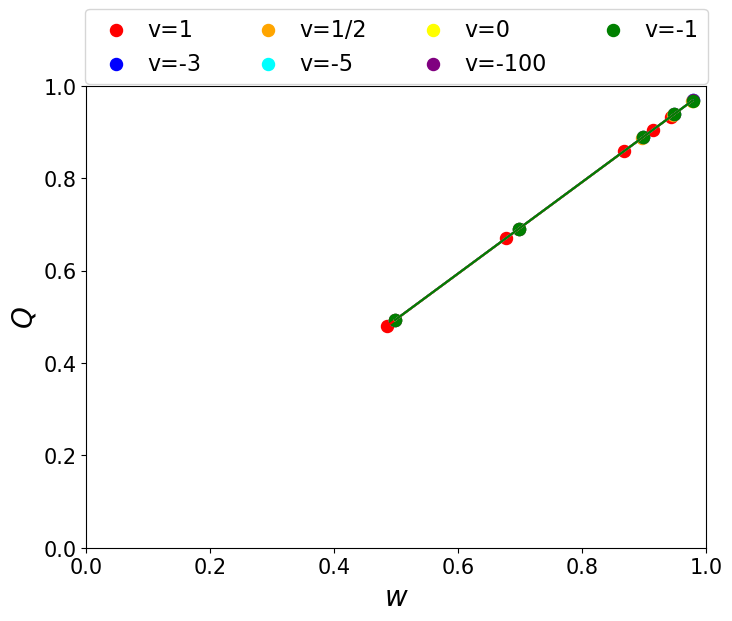

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


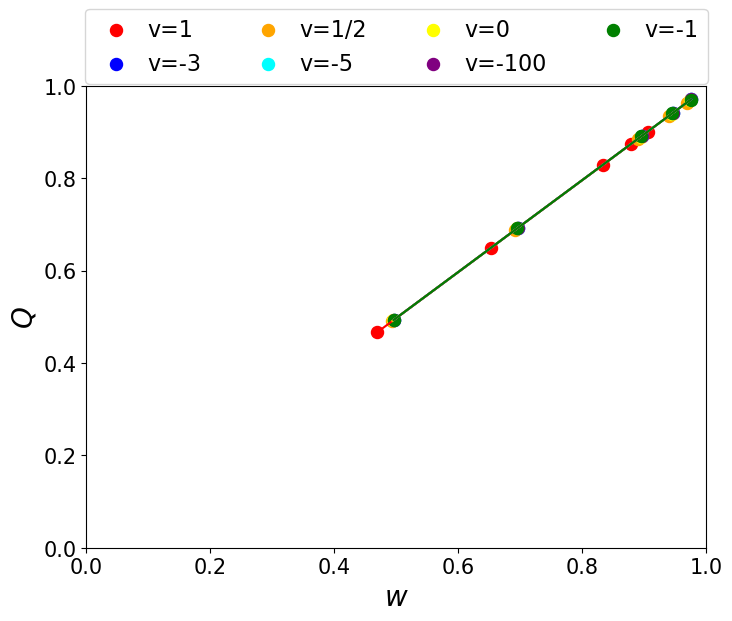

In [12]:
def plot_correlation(x_values, y_values, label, color, marker='o', size=100, linestyle='-'):  # linestyle引数を追加
    plt.scatter(x_values, y_values, label=label, color=color, marker=marker, s=size)  # 散布図を作成
    plt.plot(x_values, y_values, color=color, linestyle=linestyle)  # 線を引く

for M in M_list:
    save_path = f"~/o_t_hayashilab/modular_network_info/N={Node}/m0={M}/actual_w.npy"
    ac_w_file = np.load(os.path.expanduser(save_path), allow_pickle=True)
    save_path = f"~/o_t_hayashilab/modular_network_info/N={Node}/m0={M}/modularity_q.npy"
    q_file = np.load(os.path.expanduser(save_path), allow_pickle=True)
    
    # 散布図を作成
    plt.figure(figsize=(8, 6))
    
    plot_correlation(ac_w_file[0], q_file[0][1:], label='v=1', color='red', size=75)
    
    plot_correlation(ac_w_file[4], q_file[4][1:], label='v=-3', color='blue', size=75)
    
    plot_correlation(ac_w_file[1], q_file[1][1:], label='v=1/2', color='orange', size=75)
    
    plot_correlation(ac_w_file[5], q_file[5][1:], label='v=-5', color='cyan', size=75)
    
    plot_correlation(ac_w_file[2], q_file[2][1:], label='v=0', color='yellow', size=75)
    
    plot_correlation(ac_w_file[6], q_file[6][1:], label='v=-100', color='purple', size=75)
    
    plot_correlation(ac_w_file[3], q_file[3][1:], label='v=-1', color='green', size=75)
    
    # 軸ラベルの設定
    plt.xlabel(r"$w$", fontsize=20)
    plt.ylabel(r"$Q$", fontsize=20)
    
    # x軸の範囲を設定（0から最大値+0.05）
    plt.xlim(0, 1.0)
    # x軸の目盛りを調整（ここでは0.1刻みに設定し、フォントサイズを15に）
    plt.xticks(ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=15)
    
    # y軸の範囲を設定（0から最大値+0.05）
    plt.ylim(0, 1.0)
    plt.yticks(ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=15)
    
    # 凡例の設定（上に2×2で配置）
    plt.legend(loc='upper center', fontsize=16, bbox_to_anchor=(0.5, 1.19), ncol=4, handletextpad=0.4)
    
    # 保存先のディレクトリを指定
    save_dir = os.path.expanduser('~/o_t_hayashilab/modular_network_info/w_q_relation_plot/')
    os.makedirs(save_dir, exist_ok=True)  # ディレクトリが存在しない場合は作成
    # EPS形式で図を保存（フルパスを指定）
    save_path = os.path.join(save_dir, f"w_q_mo{M}.eps")
    plt.savefig(save_path, format='eps', bbox_inches='tight')
    
    # プロットの表示
    plt.show()